In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [3]:
from sklearn.metrics import r2_score


In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [5]:
df = pd.read_csv("project1.csv")

### verisetini tanıyalım

In [6]:
df.head()

,Year,hemisphere,Extent,AnomalyLand,AnomalyOcean,Fossil and Industrial,Agriculture Waste and Forest Burining,biomass,brown_coal,coal_coke,diesel_oil,hard_coal,heavy_oil,light_oil,natural_gas,process
0,1978,north,11.904954,0.010833,0.085000,20454.21696,4761.222033,0.0,659352.812692,288821.546116,2.221299e+06,4.464100e+06,2.995678e+06,2.843968e+06,2.325158e+06,3.950627e+06
1,1978,south,14.663550,0.183333,0.175000,20454.21696,4761.222033,0.0,659352.812692,288821.546116,2.221299e+06,4.464100e+06,2.995678e+06,2.843968e+06,2.325158e+06,3.950627e+06
2,1979,north,12.349634,0.042500,0.188333,20999.96016,4589.050767,0.0,684733.458916,307656.730292,2.251136e+06,4.651720e+06,3.019362e+06,2.883021e+06,2.462239e+06,3.998047e+06
3,1979,south,11.653819,0.299167,0.330000,20999.96016,4589.050767,0.0,684733.458916,307656.730292,2.251136e+06,4.651720e+06,3.019362e+06,2.883021e+06,2.462239e+06,3.998047e+06
4,1980,north,12.349545,0.259167,0.182500,20707.59534,4559.068800,0.0,712064.633607,328489.122354,2.156050e+06,4.795404e+06,2.822541e+06,2.828348e+06,2.543048e+06,3.865657e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   84 non-null     int64  
 1   hemisphere                             84 non-null     object 
 2   Extent                                 84 non-null     float64
 3   AnomalyLand                            84 non-null     float64
 4   AnomalyOcean                           84 non-null     float64
 5   Fossil and Industrial                  84 non-null     float64
 6   Agriculture Waste and Forest Burining  84 non-null     float64
 7   biomass                                84 non-null     float64
 8   brown_coal                             84 non-null     float64
 9   coal_coke                              84 non-null     float64
 10  diesel_oil                             84 non-null     float64
 11  hard_coa

In [8]:
df.describe()

,Year,Extent,AnomalyLand,AnomalyOcean,Fossil and Industrial,Agriculture Waste and Forest Burining,biomass,brown_coal,coal_coke,diesel_oil,hard_coal,heavy_oil,light_oil,natural_gas,process
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.000000,84.000000,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01
mean,1998.500000,11.523112,0.691974,0.409375,26821.082019,4540.139862,0.0,772234.223201,339541.606953,3.138105e+06,7.682199e+06,2.102676e+06,3.760519e+06,4.196300e+06,4.145393e+06
std,12.193718,1.006303,0.436695,0.182177,5748.726441,1114.157918,0.0,58528.574724,108199.205415,7.685113e+05,2.387302e+06,2.946296e+05,6.526646e+05,1.290125e+06,8.134532e+05
min,1978.000000,4.839170,-0.011667,0.015833,20071.086670,2449.088662,0.0,659352.812692,212524.889979,2.061194e+06,4.464100e+06,1.740121e+06,2.801356e+06,2.325158e+06,3.083302e+06
25%,1988.000000,11.240176,0.346667,0.298750,22475.378580,3557.037995,0.0,736537.700169,264942.041316,2.429260e+06,6.053619e+06,1.921562e+06,3.247753e+06,3.117848e+06,3.601470e+06
50%,1998.500000,11.632625,0.660833,0.393750,24280.234410,4574.059783,0.0,762838.274271,304025.774783,3.017712e+06,6.443855e+06,2.067951e+06,3.838032e+06,3.905726e+06,3.867078e+06
75%,2009.000000,11.954172,0.973125,0.512708,32002.121810,5495.730533,0.0,786769.966179,354011.319768,3.876727e+06,1.007394e+07,2.146559e+06,4.222377e+06,5.211445e+06,4.687368e+06
max,2019.000000,14.663550,1.981667,0.901667,36908.102400,8000.636862,0.0,927662.965492,562456.180828,4.372833e+06,1.149486e+07,3.019362e+06,4.982194e+06,6.753656e+06,5.735699e+06


C:\Users\Hp\AppData\Local\Temp\ipykernel_4904\3338341884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon_matrisi = df.corr()


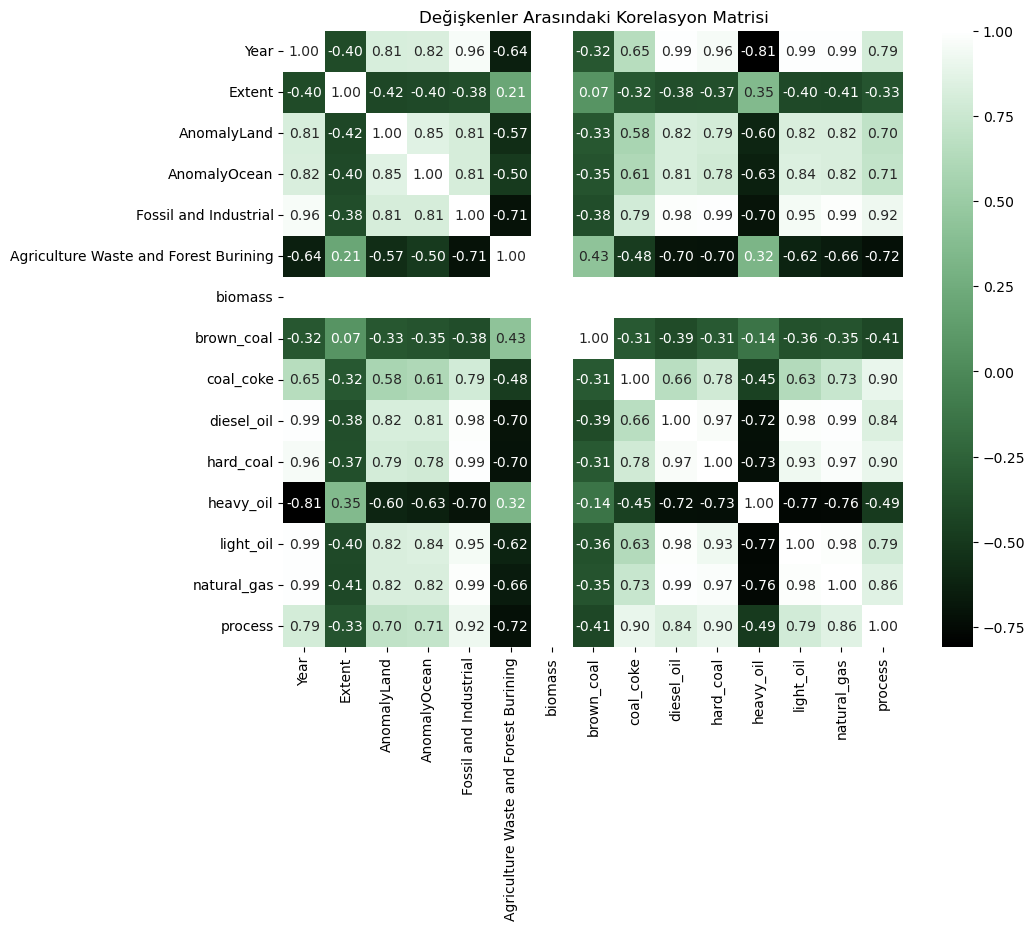

In [13]:
korelasyon_matrisi = df.corr()


plt.figure(figsize=(10, 8))
renk_paleti = sbn.cubehelix_palette(start=2, rot=0, dark=0, light=1, reverse=True, as_cmap=True)

sbn.heatmap(korelasyon_matrisi, annot=True, cmap=renk_paleti, fmt='.2f')
plt.title('Değişkenler Arasındaki Korelasyon Matrisi')
plt.show()

In [6]:
df = df.drop('biomass', axis=1)

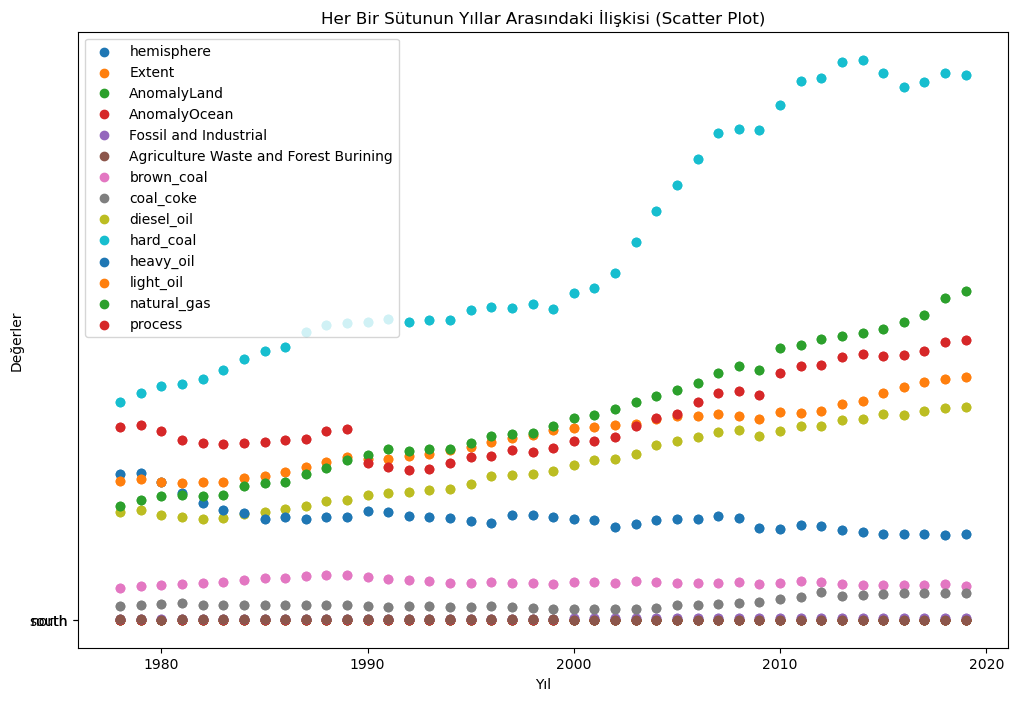

In [10]:
df.set_index('Year', inplace=True)

# Scatter plot oluştur
plt.figure(figsize=(12, 8))
for column in df.columns:
    plt.scatter(df.index, df[column], label=column)

plt.xlabel('Yıllar')
plt.ylabel('Değerler')
plt.title('Her Bir Sütunun Yıllar Arasındaki İlişkisi (Scatter Plot)')
plt.legend()
plt.show()

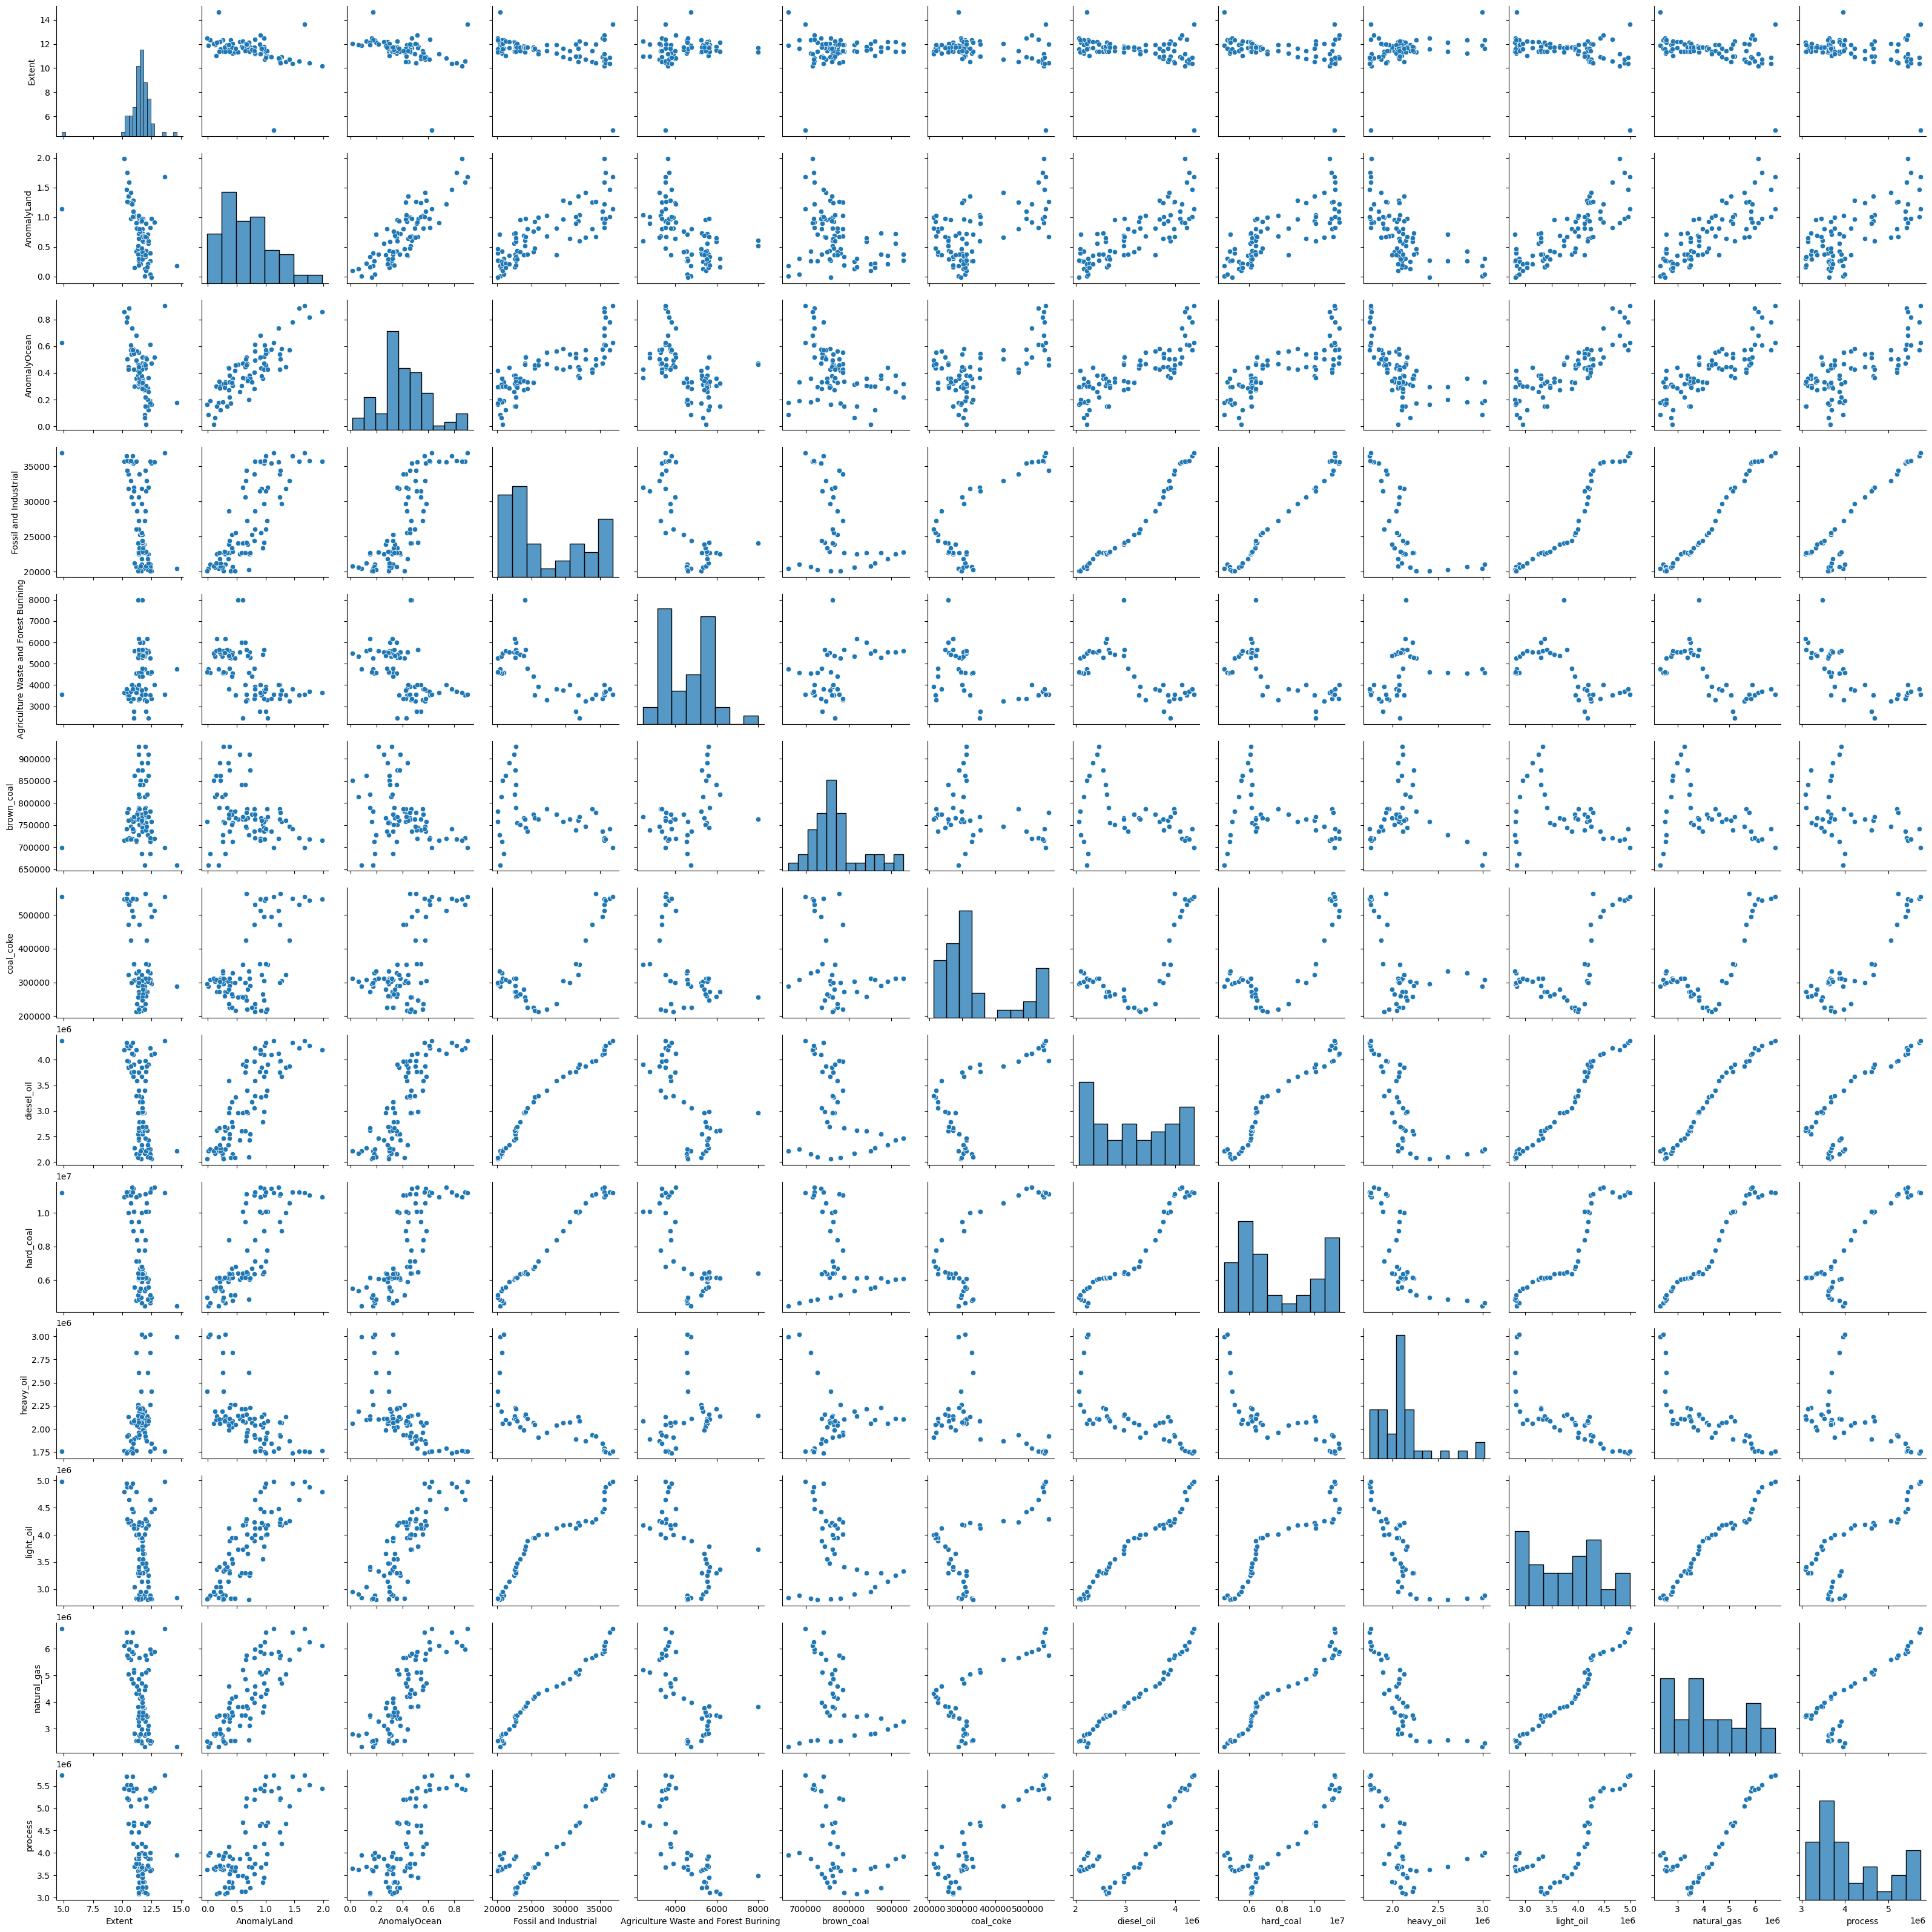

In [14]:
sbn.pairplot(df)

### labelencoder kullanacağız hemisphere için

In [14]:
le= LabelEncoder()
df['hemisphere'] = le.fit_transform(df['hemisphere'])
df.to_csv('project1_le.csv',index=False)

### modeli kur. predict al.metrikleri çek

In [8]:
X = df.drop('Extent', axis=1)
y = df['Extent']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test)

In [16]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.8951710725848134


In [25]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



In [26]:
results_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2 Score'],
    'Value': [mse, mae, rmse, r2]
})

print(results_df)

     Metric     Value
0       MSE  0.035440
1       MAE  0.131430
2      RMSE  0.188256
3  R2 Score  0.895171


### y_test ve y_pred kıyaslaması

In [40]:
comparison_df = pd.DataFrame({
    'Year': X_test['Year'],
    #'Hemisphere': X_test['hemisphere'],
    'Actual_Extent': y_test,
    'Predicted_Extent': y_pred
})

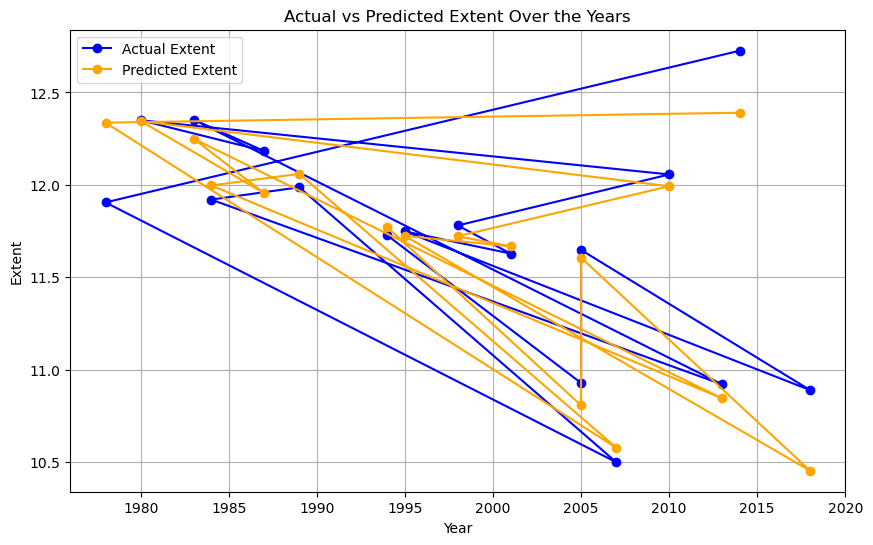

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(comparison_df['Year'], comparison_df['Actual_Extent'], label='Actual Extent', marker='o', linestyle='-', color='blue')
plt.plot(comparison_df['Year'], comparison_df['Predicted_Extent'], label='Predicted Extent', marker='o', linestyle='-', color='orange')

plt.title('Actual vs Predicted Extent Over the Years')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.legend()
plt.grid(True)
plt.show()

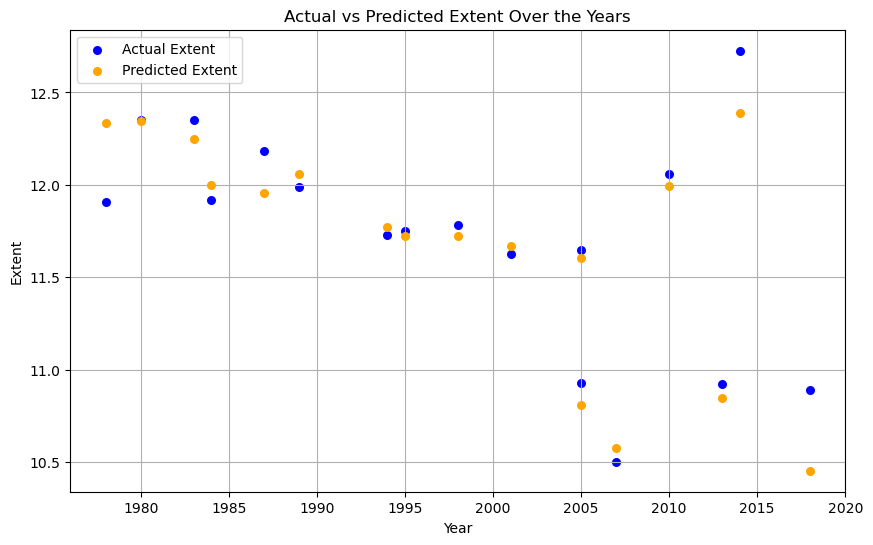

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(comparison_df['Year'], comparison_df['Actual_Extent'], label='Actual Extent', color='blue', s=30)
plt.scatter(comparison_df['Year'], comparison_df['Predicted_Extent'], label='Predicted Extent', color='orange', s=30)

plt.title('Actual vs Predicted Extent Over the Years')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.legend()
plt.grid(True)
plt.show()

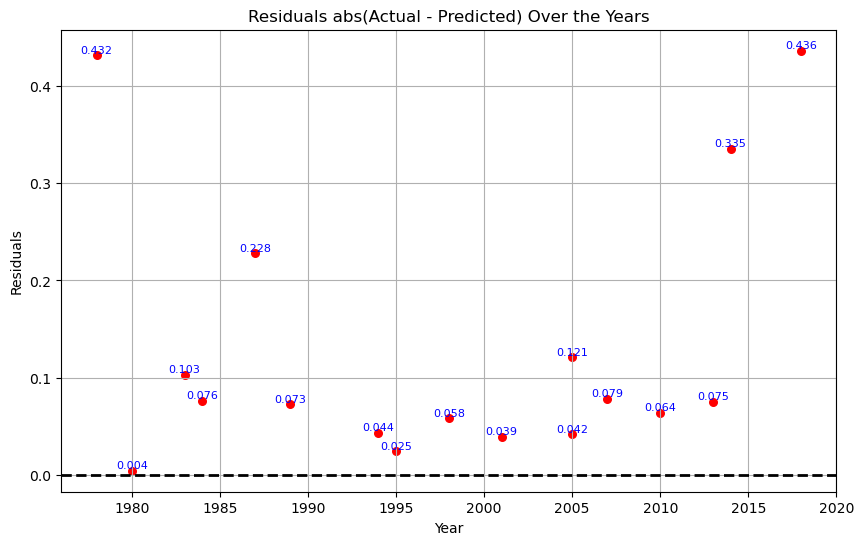

In [43]:
residuals = abs(y_test - y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Year'], residuals, color='red', s=30)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)  # Hata sıfır olduğunda çizgi

# Residual değerlerini noktaların üzerine yazma
for i, txt in enumerate(residuals):
    plt.annotate(f"{txt:.3f}", (X_test['Year'].iloc[i], residuals.iloc[i]), fontsize=8, ha='center', va='bottom', color='blue')

plt.title('Residuals abs(Actual - Predicted) Over the Years')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

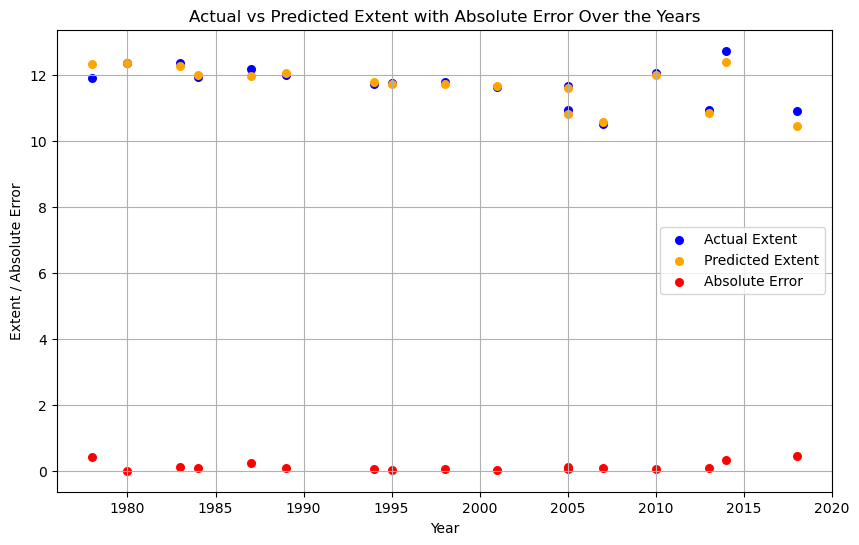

In [47]:
absolute_errors = abs(y_test - y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(X_test['Year'], y_test, label='Actual Extent', color='blue', s=30)
plt.scatter(X_test['Year'], y_pred, label='Predicted Extent', color='orange', s=30)
plt.scatter(X_test['Year'], absolute_errors, label='Absolute Error', color='red', s=30)

plt.title('Actual vs Predicted Extent with Absolute Error Over the Years')
plt.xlabel('Year')
plt.ylabel('Extent / Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

### feature importance visualize

In [48]:
feature_importances = rf_model.feature_importances_

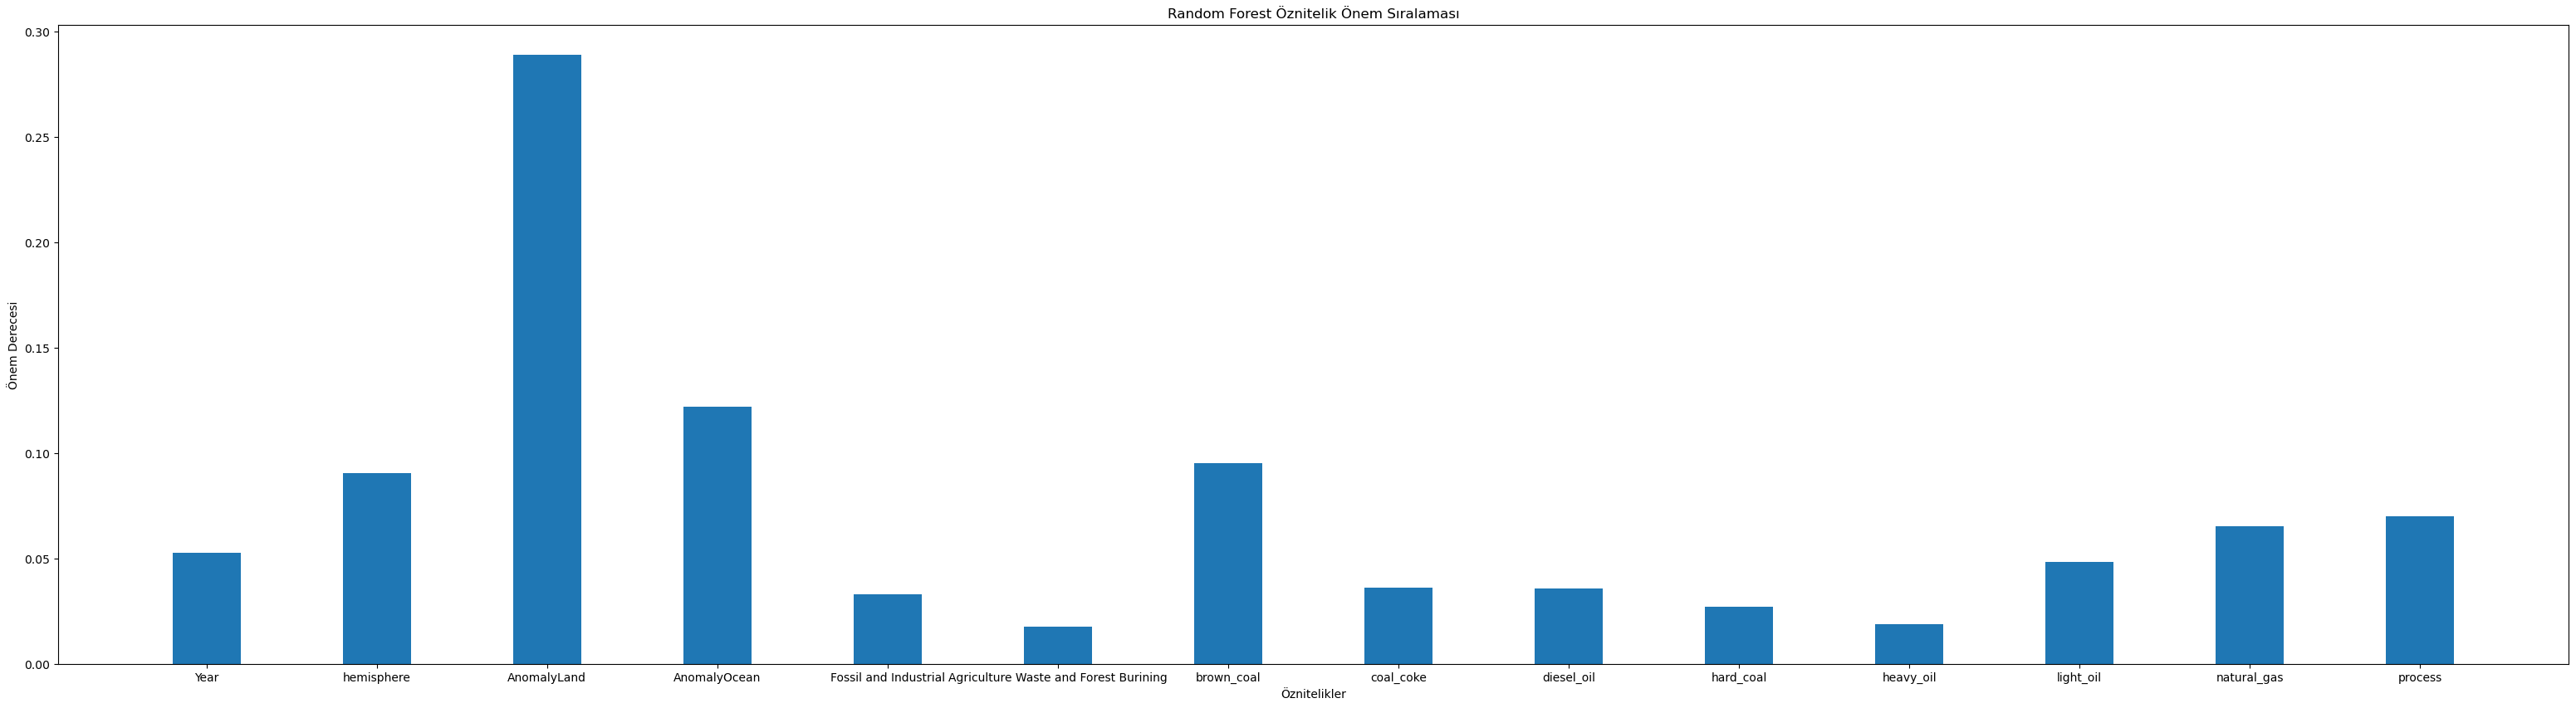

In [49]:
plt.figure(figsize=(39, 10))
feature_names = X.columns
plt.bar(feature_names, feature_importances,width=0.4)
plt.xlabel('Öznitelikler')
plt.ylabel('Önem Derecesi')
plt.title('Random Forest Öznitelik Önem Sıralaması')
plt.show()

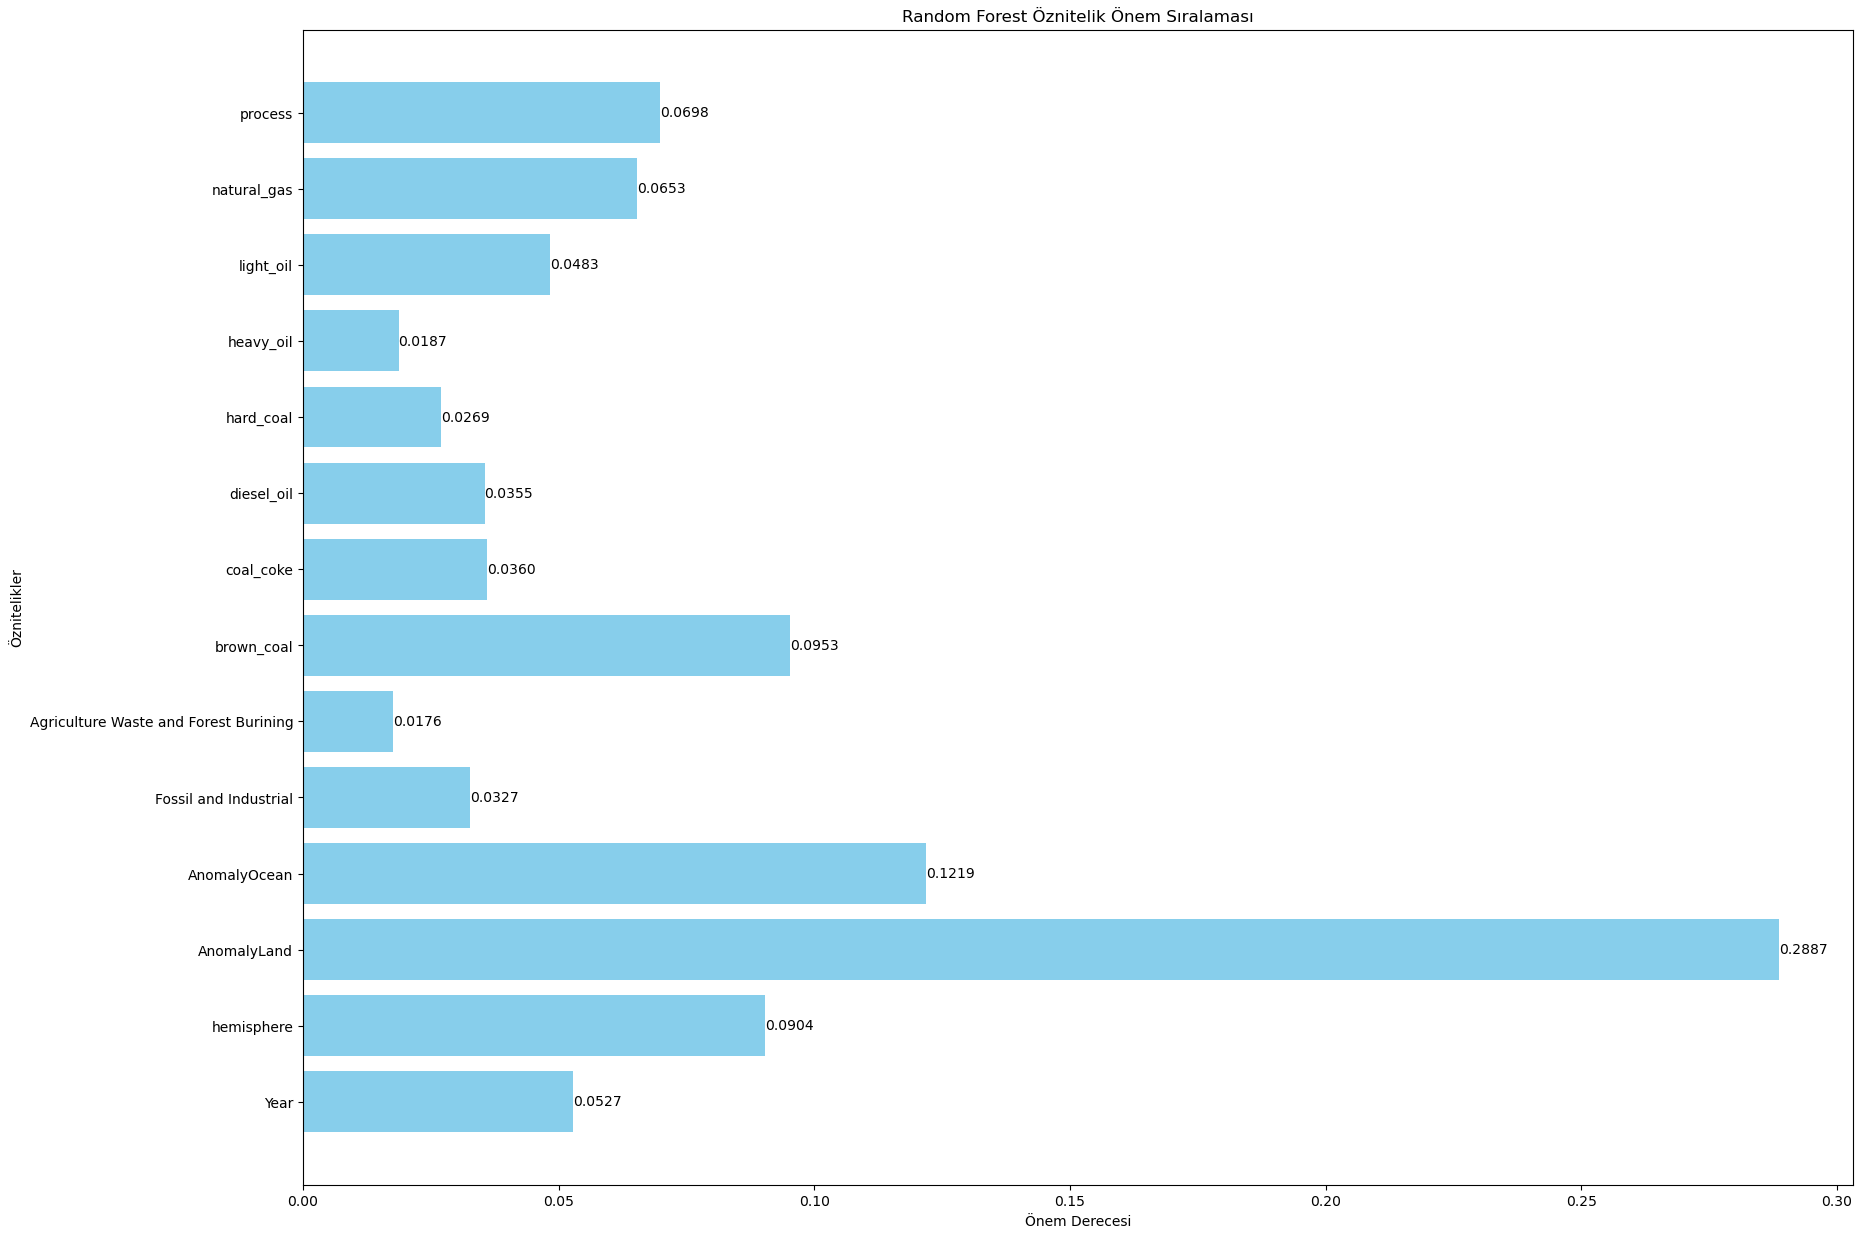

In [50]:



plt.figure(figsize=(20, 15))

# Yatay bar grafiği oluştur
plt.barh(range(len(feature_importances)), feature_importances, color='skyblue')
plt.yticks(range(len(feature_importances)), X.columns)  # Y ekseni etiketleri
plt.xlabel('Önem Derecesi')
plt.ylabel('Öznitelikler')
plt.title('Random Forest Öznitelik Önem Sıralaması')

# Barların üstüne değerleri yaz
for index, value in enumerate(feature_importances):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', color='black')

plt.show()